# 10. 서브플롯을 통한 ETF 데이터 시각화

## 10.1 분석을 위한 기본 설정

### 10.1.1 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<br>

### 10.1.2 시각화를 위한 한글 폰트 설정

In [3]:
import platform

# 설정 가능한 그래프 스타일 확인
#print(plt.style.available)

# 그래프 스타일 설정 (seaborn-whitegrid)
plt.style.use('seaborn-whitegrid') # seaborn 스타일 설정은 폰트 설정 이전에 실행해야 한다.

# 한글 폰트 설정
from matplotlib import font_manager, rc

# 일반 폰트 설정
font_fname = ''
if 'Windows' in platform.system(): # 윈도우
    font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'
elif 'Darwin' in platform.system(): # 맥 OS
    font_fname = '' # 맥 OS 폰트 경로
elif 'Linux' in platform.system(): # 리눅스
    font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

# 마이너스 폰트 설정
rc('axes', unicode_minus=False)

# retina display 적용 (선명하게)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

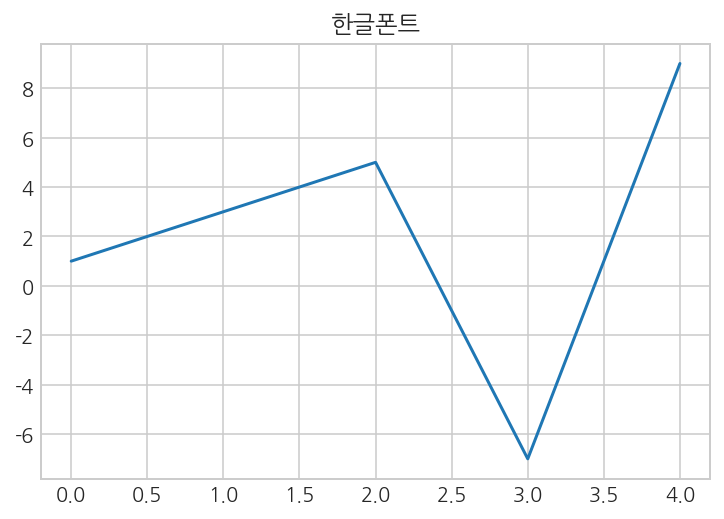

In [4]:
# 설정 확인
g = pd.Series([1, 3, 5, -7, 9]).plot(title='한글폰트')

<br>

### 10.1.3 데이터 불러오기

In [5]:
df = pd.read_csv('etf_2021-02-03.csv', dtype={'종목코드': np.object})
df.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지
0,069500,1,KODEX 200,43130,2,355,0.83,43214.0,39.9522,8521906,366352,62625,국내 시장지수,KODEX,False,False,False
1,102110,1,TIGER 200,42970,2,360,0.84,43038.0,39.9710,1650818,70651,31347,국내 시장지수,TIGER,False,False,False
2,252670,3,KODEX 200선물인버스2X,2055,5,-35,-1.67,2051.0,-51.2821,642008913,1329284,20227,국내 파생,KODEX,True,False,False
3,122630,3,KODEX 레버리지,27825,2,475,1.74,28022.0,92.0646,46157932,1275107,19088,국내 파생,KODEX,False,True,False
4,102780,2,KODEX 삼성그룹,10530,2,70,0.67,10545.0,37.6315,612363,6415,18522,국내 업종/테마,KODEX,False,False,False


<br>

## 10.2 여러 개의 변수로 서브플롯 그리기

### 10.2.1 `PairGrid`를 통한 시각화

- `PairGrid` 에는 `barplot` 함수의 `x`, `y` 속성 대신 `x_vars`, `y_vars` 속성이 존재한다.
- `PairGrid`는 `plt.figure()`를 사용해서 크기를 조절할 수 없고, `height`, `aspect` 속성을 대신하여 사용한다.
- `PairGrid`에 여러 가지 속성을 지정한 것을 변수로 지정(`g`)해 두고, `g.map()`에 시각화할 그래프의 유형을 지정해준다.
- `PairGrid`는 한 번에 서브플롯을 쉽게 그릴 수 있는 장점이 있지만 share axis in PairGrid(축별 데이터를 각 서브플롯이 공유하는 것)는 지원하지 않는다.
  - `g.set(xlabel)` 을 통해 x축 제목만 설정해줄 수 있다.  
  
  
- 개괄적인 내용을 빨리 그려보고자 할 때 `PairGrid`를 사용하는 것이 유용할 것이다.

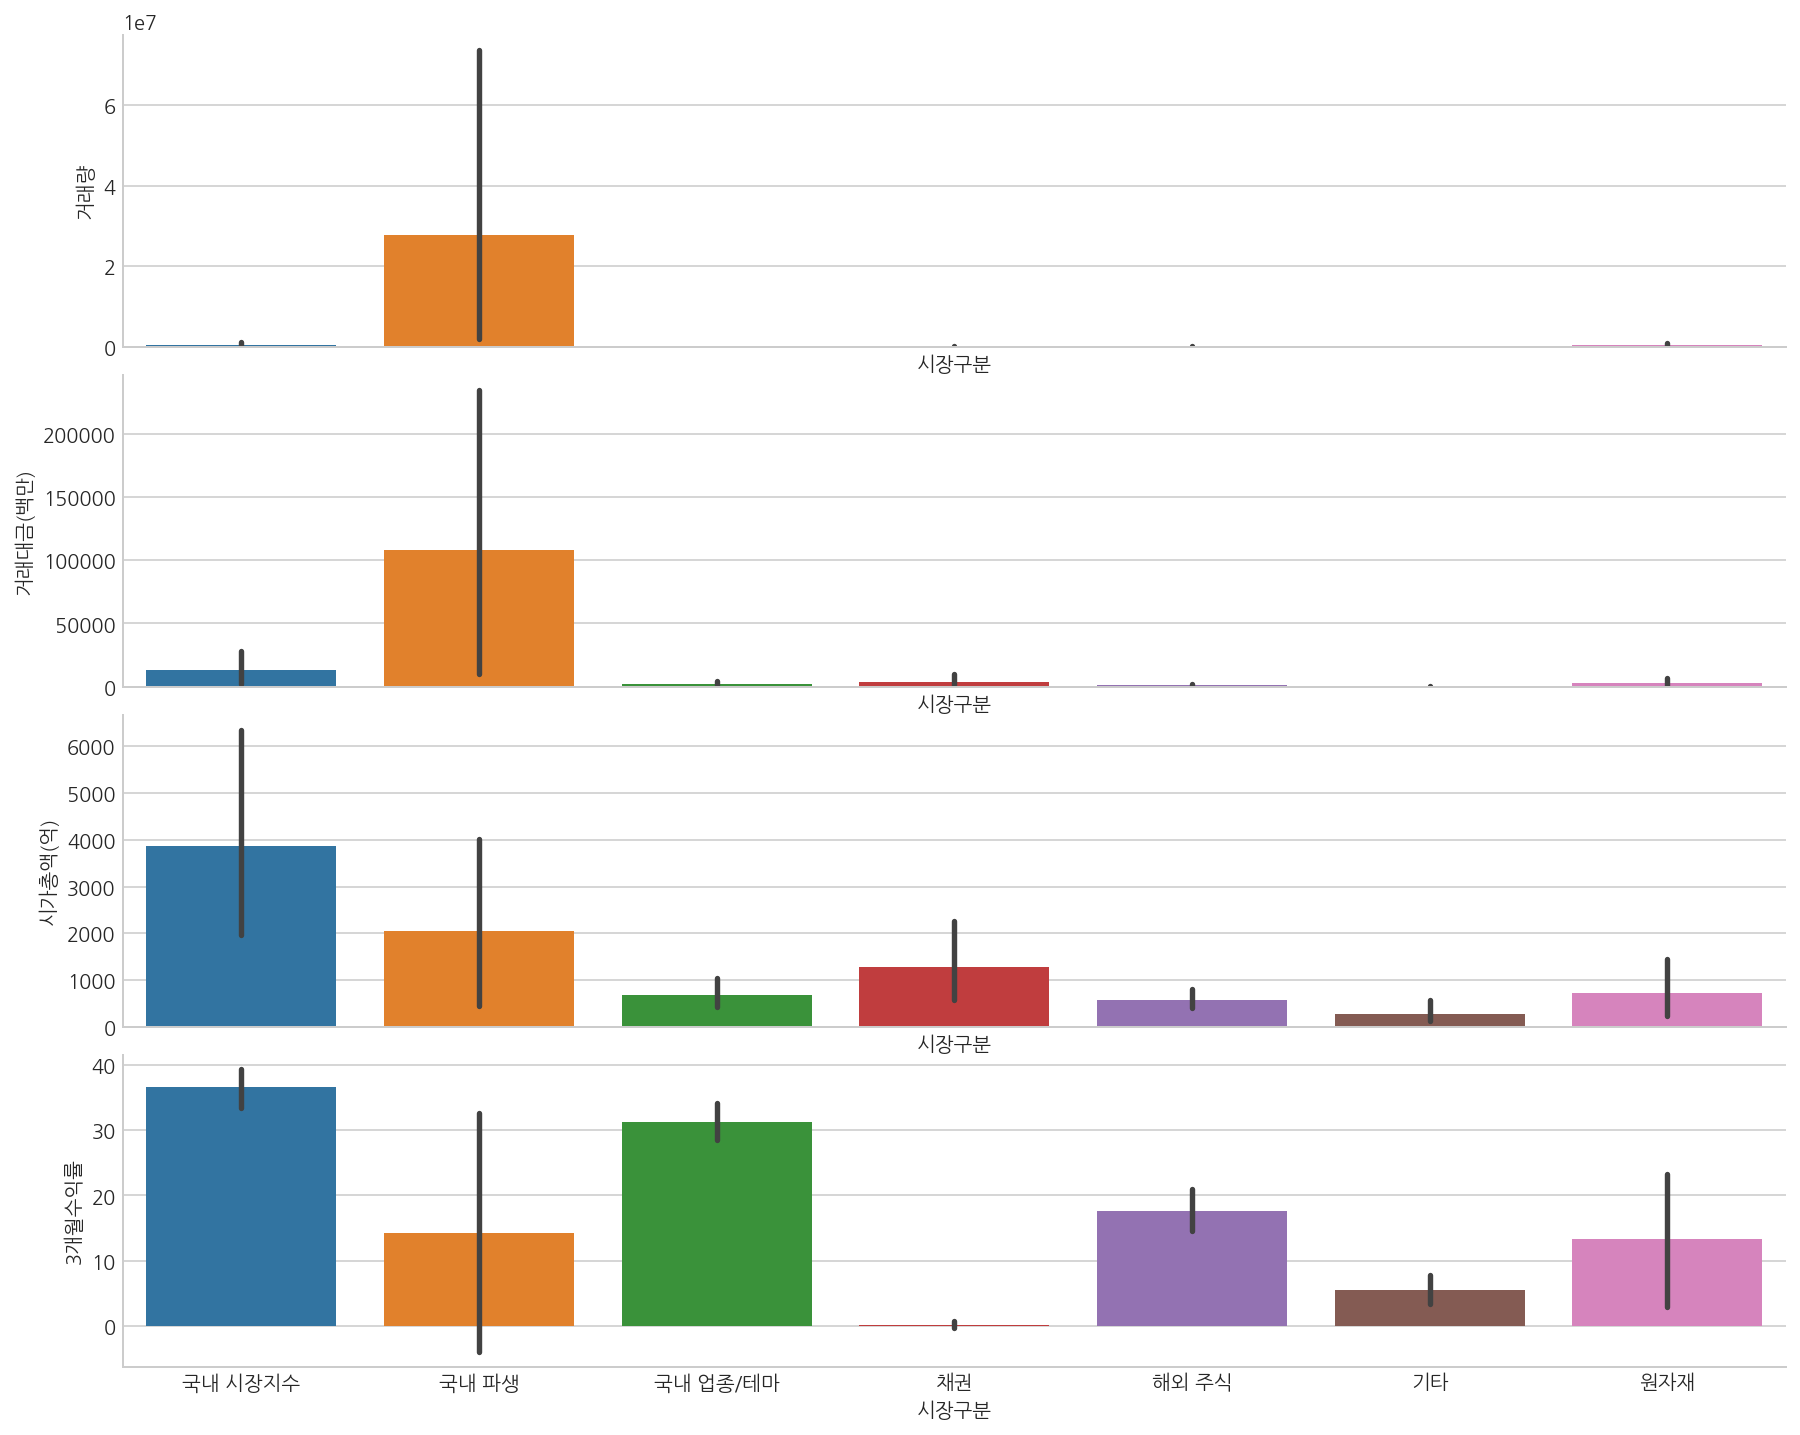

In [12]:
g = sns.PairGrid(data=df, 
                 x_vars='유형', 
                 y_vars=['거래량', '거래대금(백만)', '시가총액(억)', '3개월수익률'],
                 aspect=5) # x축 크기 조절

g.map(sns.barplot)
g.set(xlabel='시장구분')

<br>

### 10.2.2 `subplots`를 통한 시각화

In [13]:
row_cols = ['거래량', '거래대금(백만)', '시가총액(억)', '3개월수익률']

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

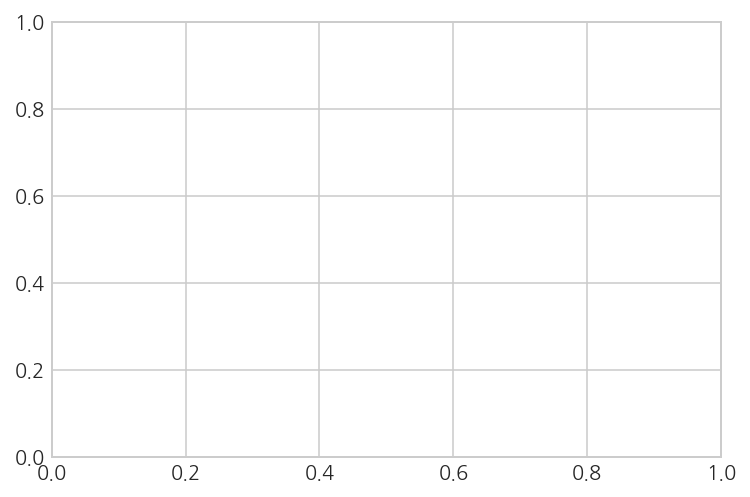

In [14]:
plt.subplots()

(<Figure size 432x288 with 4 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       dtype=object))

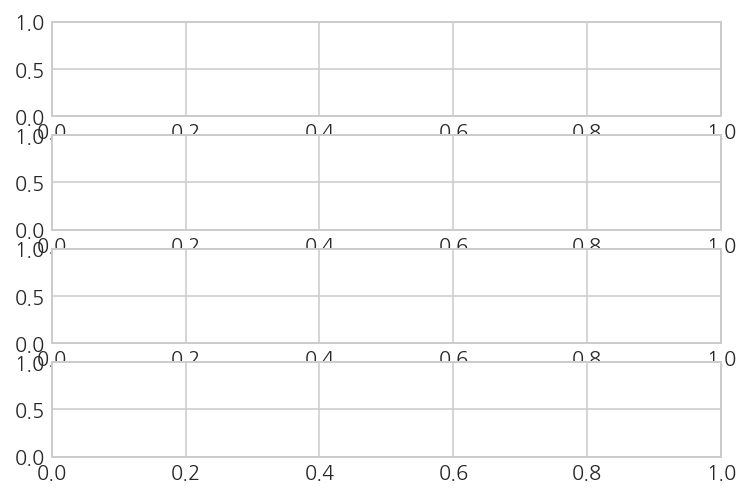

In [15]:
plt.subplots(nrows=len(row_cols))

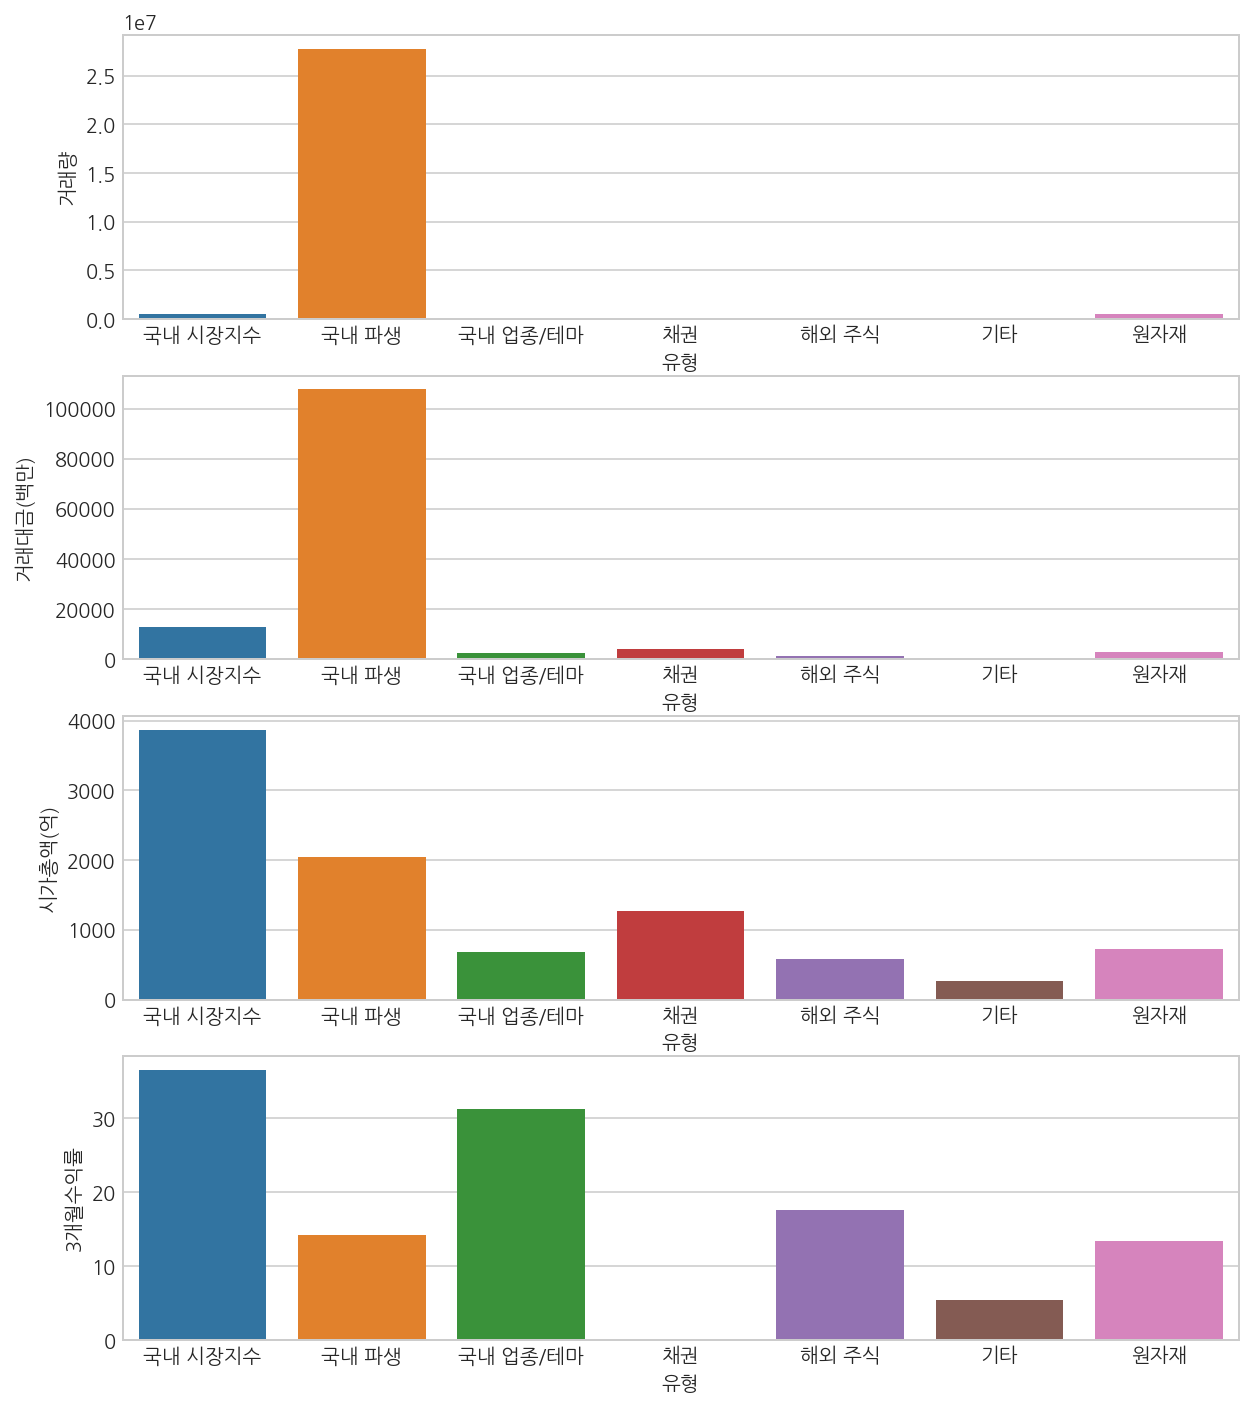

In [24]:
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10,12))
for i, rcol in enumerate(row_cols):
    sns.barplot(data=df, x='유형', y=rcol, ax=axes[i], ci=None)
plt.show()

<br>

## 10.3 브랜드별 서브플롯 시각화 (barplot)

### 10.3.1 브랜드별 수치 데이터 평균 시각화

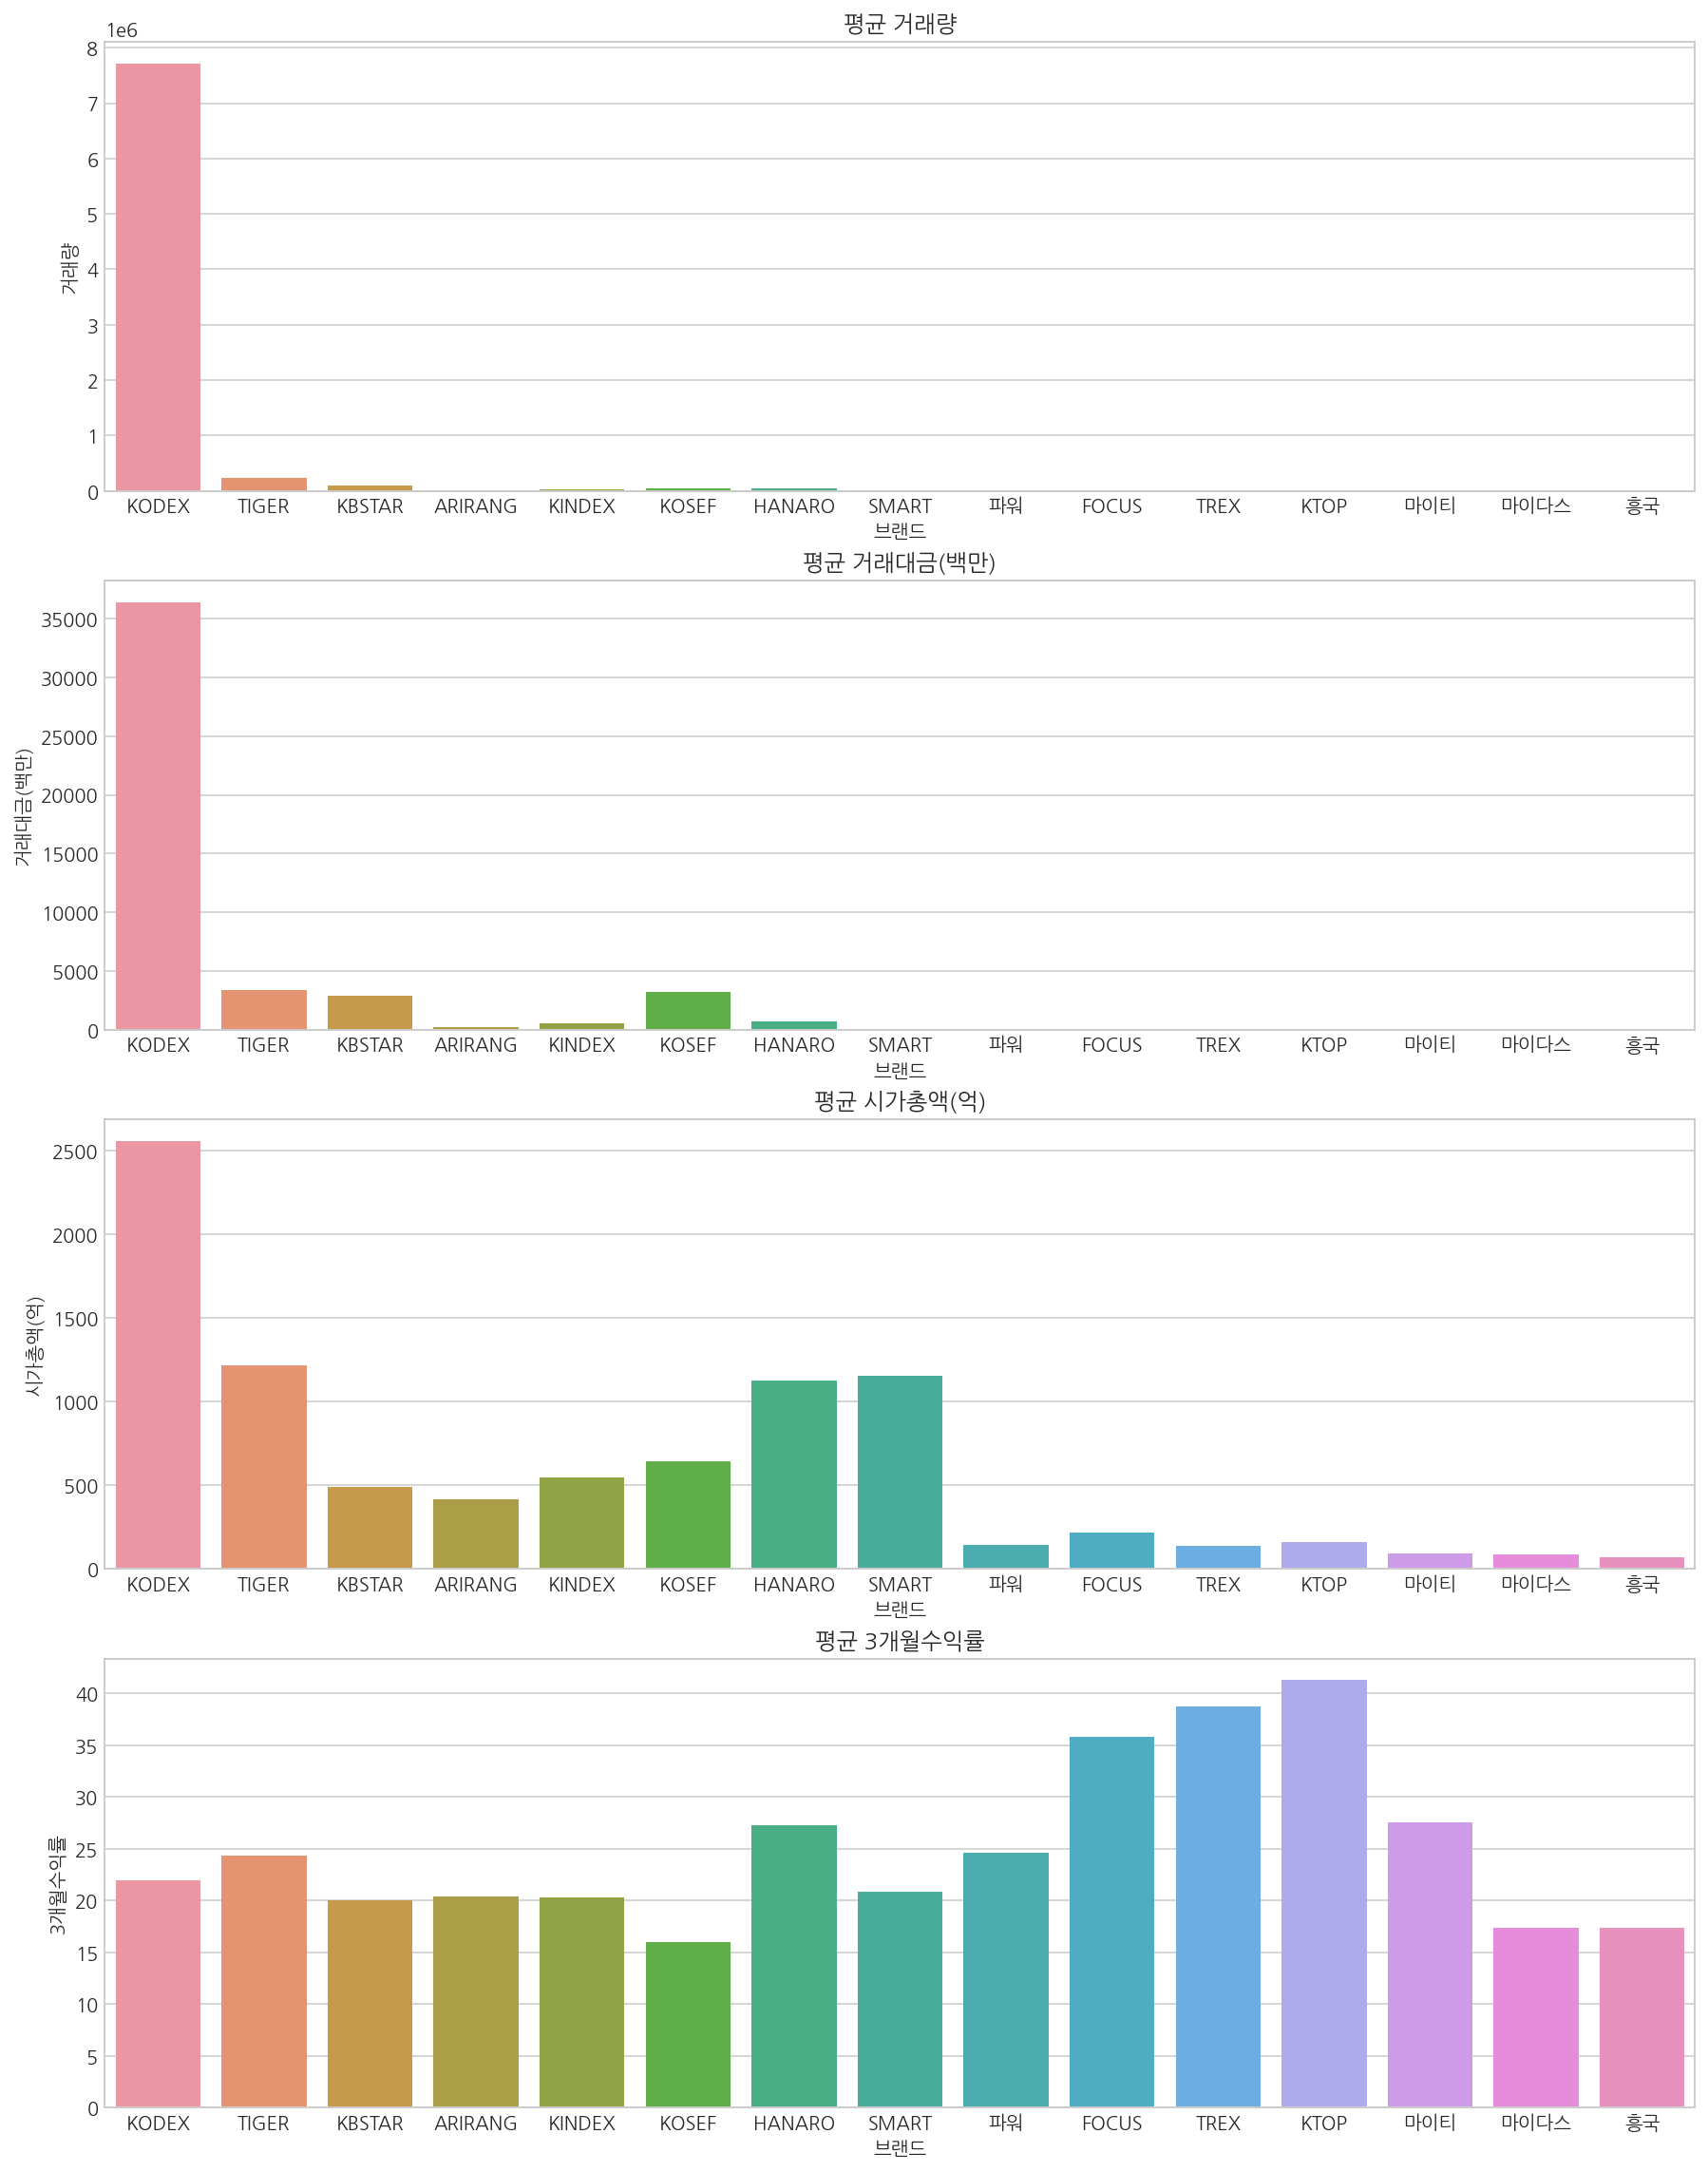

In [37]:
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(15,20))

for i, rcol in enumerate(row_cols):
    sns.barplot(data=df, x='브랜드', y=rcol, ci=None, ax=axes[i]).set_title(f"평균 {rcol}")

plt.show()

<br>

### 10.3.2 브랜드별 인버스 여부에 따른 수치 데이터 평균 시각화

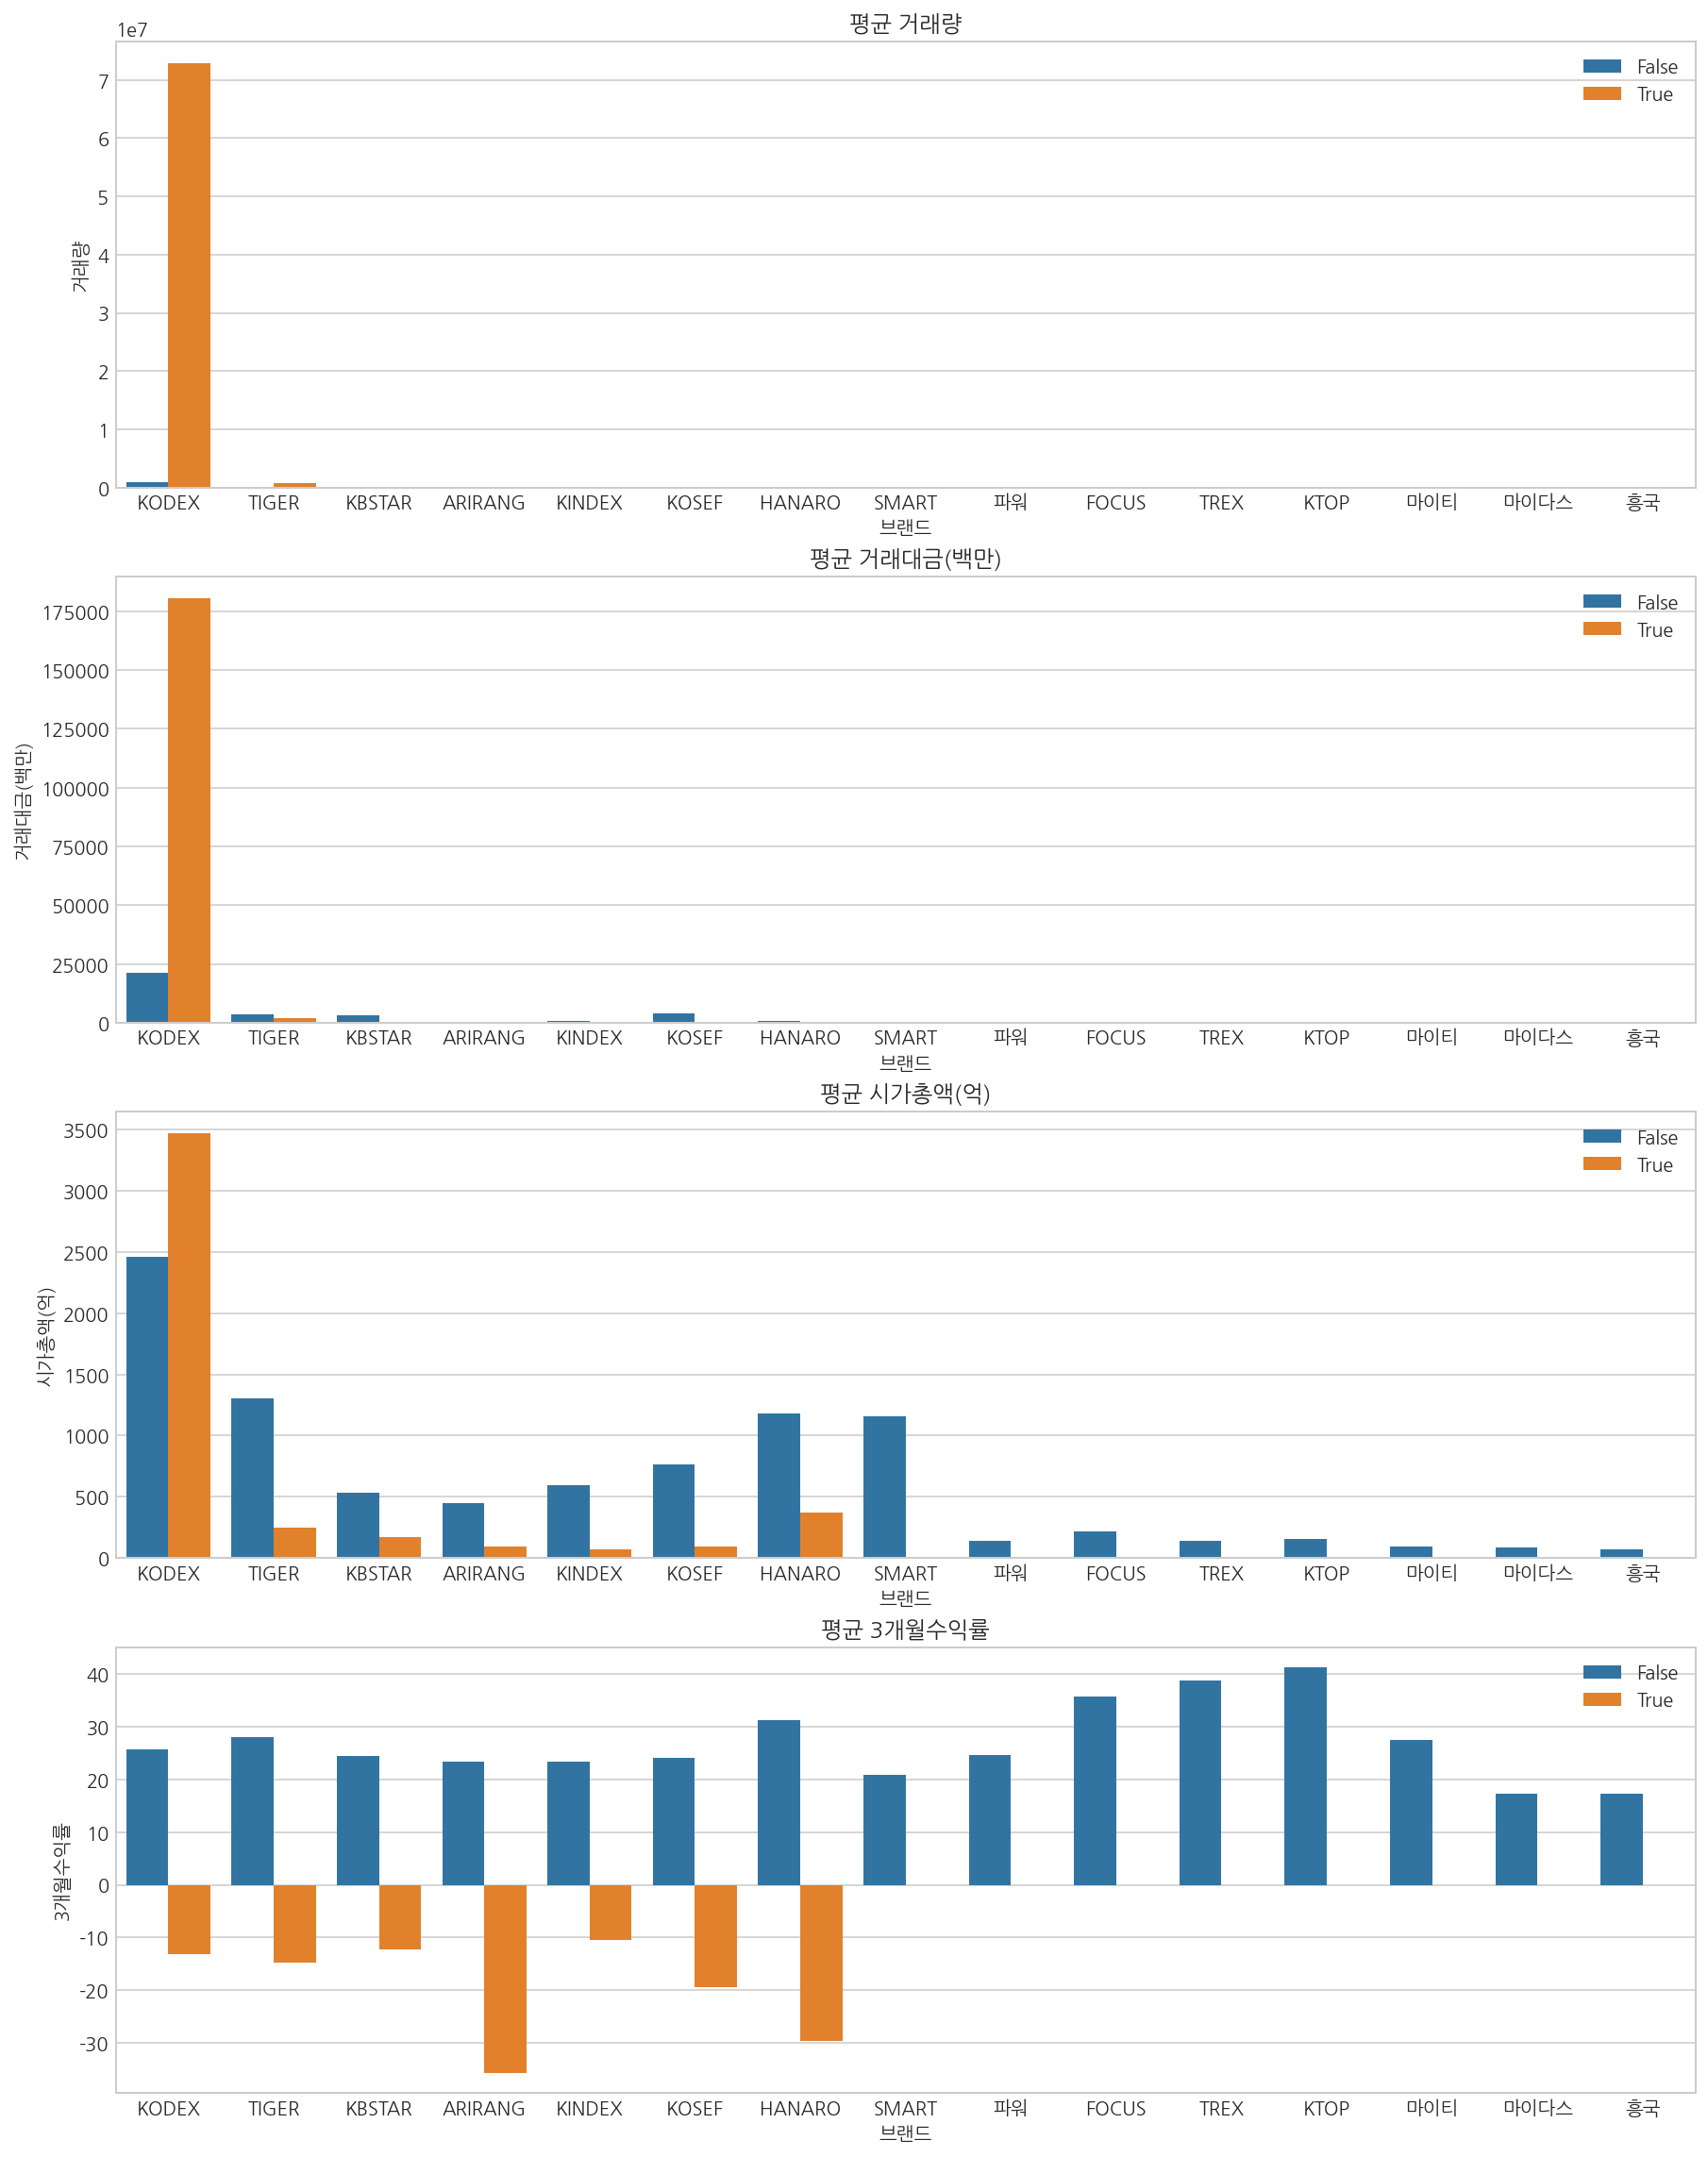

In [44]:
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(15,20))

for i, rcol in enumerate(row_cols):
    g = sns.barplot(data=df, x='브랜드', y=rcol, ci=None, ax=axes[i], hue='인버스')
    g.set_title(f"평균 {rcol}")
    g.legend(loc=1) # 1: upper right

plt.show()

<br>

### 10.3.3 브랜드별 레버리지 여부에 따른 수치 데이터 평균 시각화

In [40]:
row_cols

['거래량', '거래대금(백만)', '시가총액(억)', '3개월수익률']

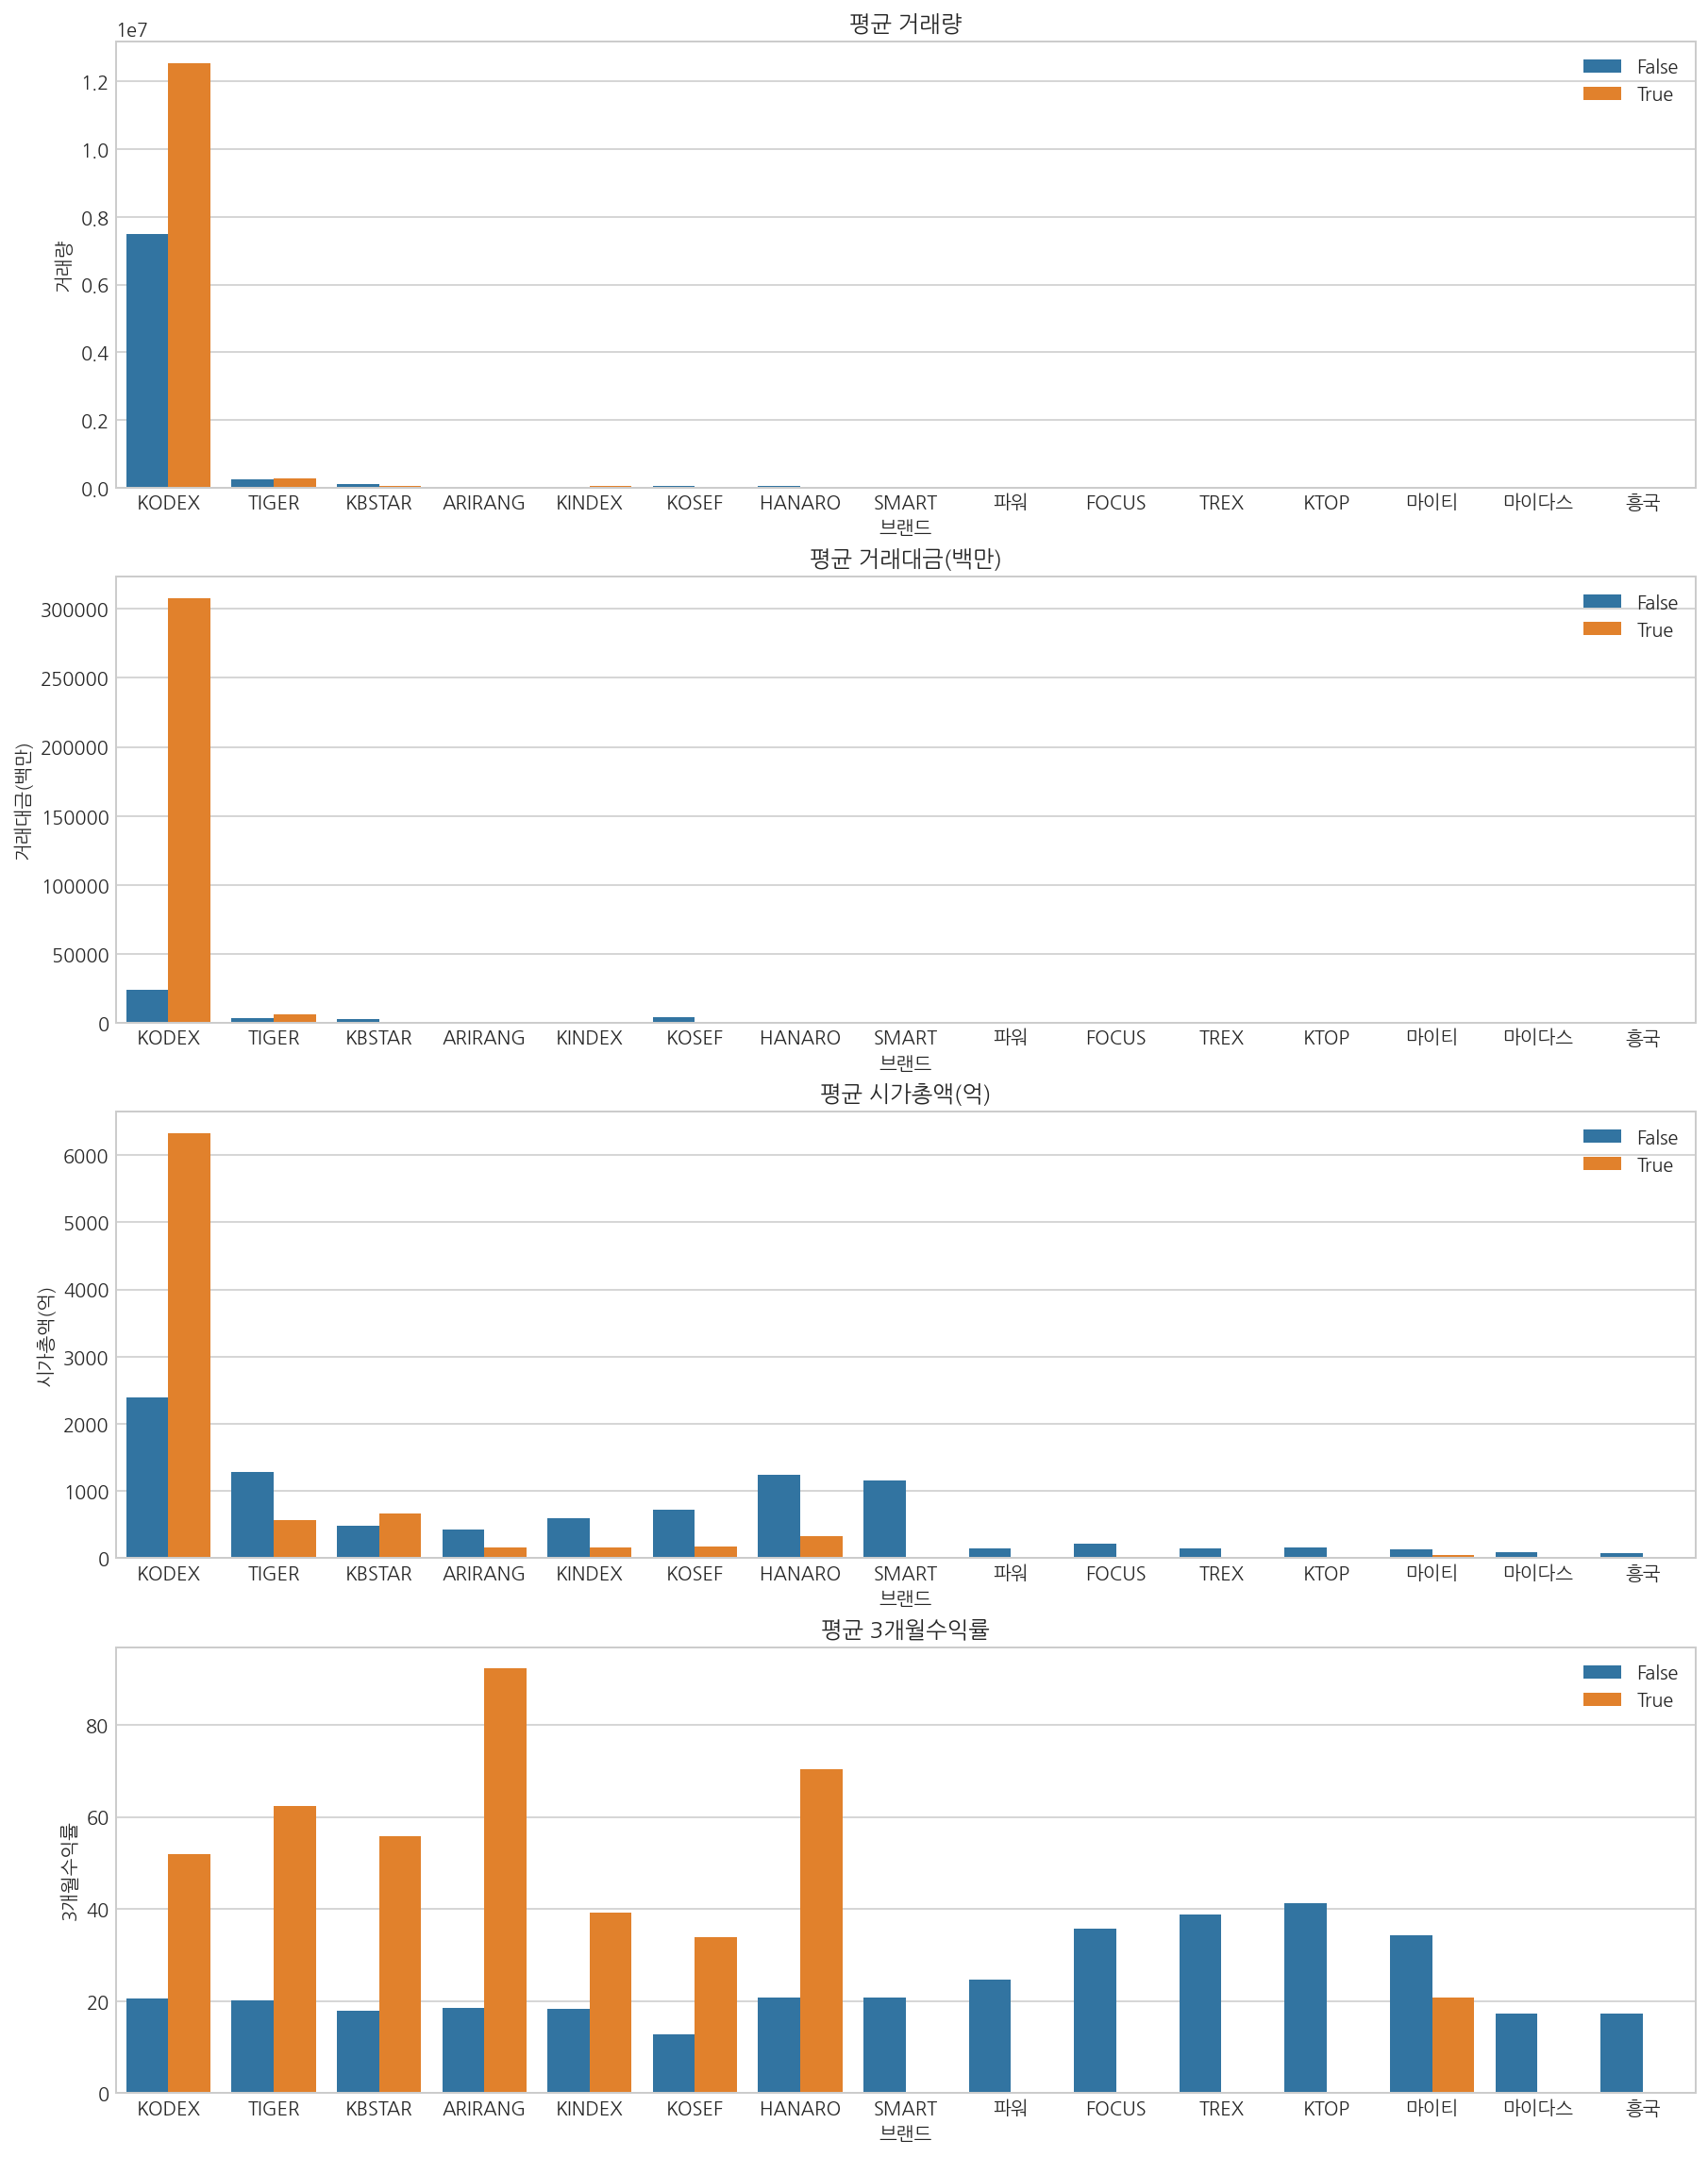

In [47]:
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(15, 20))

for i, rcol in enumerate(row_cols):
    g = sns.barplot(data=df, x='브랜드', y=rcol, ax=axes[i], hue='레버리지', ci=None)
    g.set_title(f"평균 {rcol}")
    g.legend(loc=1) # 1: upper right
    
plt.show()

<br>

### 10.3.4 `groupby`를 통한 브랜드별 평균 수치 데이터 확인

In [48]:
df.groupby(['브랜드'])[row_cols].mean() # 10.3.1

,거래량,거래대금(백만),시가총액(억),3개월수익률
브랜드,,,,
ARIRANG,1.695062e+04,263.375000,418.825000,20.424215
FOCUS,2.050000e+02,2.000000,216.000000,35.803600
HANARO,4.209531e+04,690.250000,1128.375000,27.308067
KBSTAR,9.974010e+04,2900.051948,492.493506,20.026073
KINDEX,2.886093e+04,568.956522,548.326087,20.279767
KODEX,7.719876e+06,36397.120690,2559.120690,21.941112
KOSEF,4.898368e+04,3249.892857,644.607143,15.979874
KTOP,2.500000e+02,7.000000,158.000000,41.297800
SMART,7.481400e+03,115.400000,1154.400000,20.865000


In [49]:
df.groupby(['브랜드', '인버스'])[row_cols].mean() # 10.3.2

거래량       거래대금(백만)      시가총액(억)     3개월수익률
브랜드     인버스                                                       
ARIRANG False  9.442649e+03     245.594595   445.243243  23.460254
        True   1.095490e+05     482.666667    93.000000 -35.742500
FOCUS   False  2.050000e+02       2.000000   216.000000  35.803600
HANARO  False  4.366027e+04     725.266667  1179.066667  31.372550
        True   1.862100e+04     165.000000   368.000000 -29.594700
KBSTAR  False  9.260612e+04    3239.676471   534.764706  24.569520
        True   1.536413e+05     334.000000   173.111111 -12.282889
KINDEX  False  2.950010e+04     613.214286   594.095238  23.430259
        True   2.214975e+04     104.250000    67.750000 -10.437525
KODEX   False  8.852107e+05   21285.561905  2463.580952  25.733093
        True   7.295987e+07  180643.818182  3471.090909 -13.220891
KOSEF   False  4.862078e+04    3929.347826   764.434783  24.036445
        True   5.065300e+04     124.400000    93.400000 -19.469040
KTOP    False  2.500000e+02       7.000000   158.000000  41.297800
SMART   False  7.481400e+03     115.400000  1154.400000  20.865000
TIGER   False  1.908363e+05    3530.042735  1306.495726  28.106597
        True   6.875042e+05    1853.181818   248.909091 -14.722955
TREX    False  1.700000e+01       0.500000   139.000000  38.758300
마이다스    False  4.200000e+01       0.000000    89.000000  17.361900
마이티     False  1.945000e+02       3.500000    90.500000  27.557100
파워      False  1.910000e+02       7.000000   140.750000  24.638025
흥국      False  0.000000e+00       0.000000    72.000000  17.366900

In [50]:
df.groupby(['브랜드', '레버리지'])[row_cols].mean() # 10.3.3

거래량       거래대금(백만)      시가총액(억)     3개월수익률
브랜드     레버리지                                                      
ARIRANG False  1.729997e+04     265.871795   425.692308  18.534203
        True   3.326000e+03     166.000000   151.000000  92.244700
FOCUS   False  2.050000e+02       2.000000   216.000000  35.803600
HANARO  False  4.632771e+04     760.214286  1243.500000  20.680723
        True   1.246850e+04     200.500000   322.500000  70.385800
KBSTAR  False  1.027100e+05    3013.493151   483.438356  17.948771
        True   4.553875e+04     829.750000   657.750000  55.859525
KINDEX  False  2.640356e+04     566.414634   595.707317  18.339556
        True   4.901140e+04     589.800000   159.800000  39.196825
KODEX   False  7.502244e+06   24165.243243  2389.405405  20.548330
        True   1.255132e+07  307944.800000  6326.800000  52.025220
KOSEF   False  5.629483e+04    3778.750000   723.833333  12.850883
        True   5.116750e+03      76.750000   169.250000  33.971575
KTOP    False  2.500000e+02       7.000000   158.000000  41.297800
SMART   False  7.481400e+03     115.400000  1154.400000  20.865000
TIGER   False  2.299834e+05    3091.655172  1282.500000  20.218211
        True   2.676932e+05    6230.666667   569.000000  62.471117
TREX    False  1.700000e+01       0.500000   139.000000  38.758300
마이다스    False  4.200000e+01       0.000000    89.000000  17.361900
마이티     False  2.060000e+02       6.000000   132.000000  34.358400
        True   1.830000e+02       1.000000    49.000000  20.755800
파워      False  1.910000e+02       7.000000   140.750000  24.638025
흥국      False  0.000000e+00       0.000000    72.000000  17.366900

<br>

### 10.3.5 `groupby` 결과 스타일 지정

In [51]:
gb = df.groupby(['브랜드', '레버리지'])[row_cols].mean()
gb.style.background_gradient()

<br>

## 10.4 유형별 서브플롯 시각화 (boxplot, violinplot)

### 10.4.1 유형별 3개월 수익률 boxplot

- boxplot을 사용하면 barplot을 사용했을 땐 보이지 않던 데이터의 빈도수와 데이터의 분포를 확인할 수 있다.

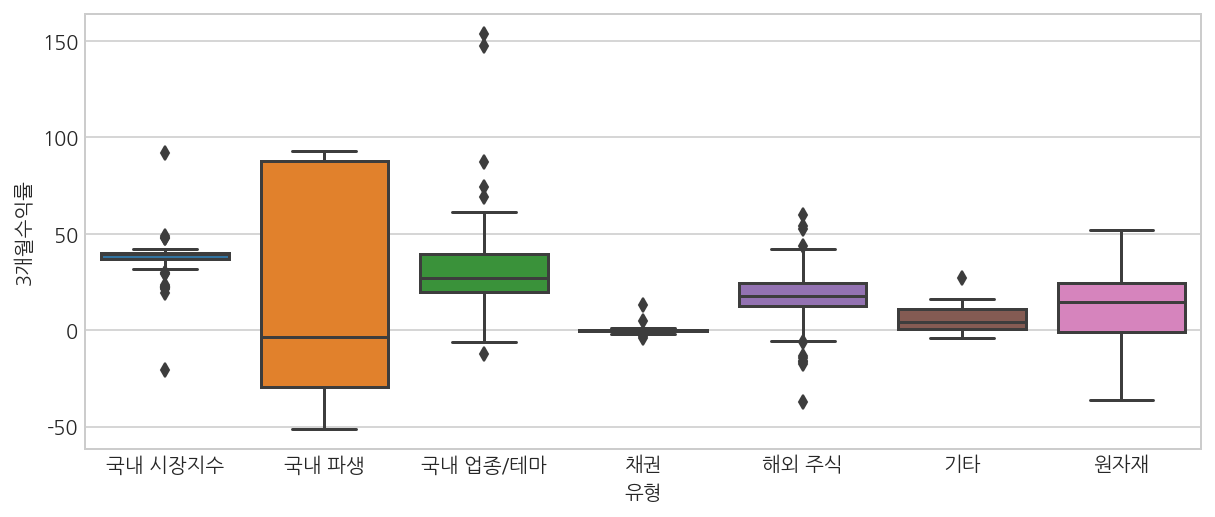

In [56]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='유형', y='3개월수익률')
plt.show()

<br>

### 10.4.2 유형별 3개월 수익률 기술통계값

In [58]:
df.groupby(['유형'])['3개월수익률'].describe()

,count,mean,std,min,25%,50%,75%,max
유형,,,,,,,,
국내 시장지수,64.0,36.580961,12.139385,-20.5259,36.78465,39.44340,40.205450,91.9755
국내 업종/테마,169.0,31.244233,19.571331,-12.3174,19.78730,27.28680,39.510100,153.7142
국내 파생,31.0,14.213858,56.048617,-51.3482,-29.58800,-3.36520,88.022650,92.7743
기타,33.0,5.431424,6.790372,-3.9389,0.71500,4.41980,10.842800,26.9162
원자재,14.0,13.344893,21.493876,-36.0607,-1.16435,14.77185,24.468000,52.0149
채권,55.0,0.082807,2.167978,-3.8361,-0.66580,0.13160,0.248500,13.2679
해외 주식,86.0,17.621271,15.948123,-36.9982,12.33465,17.86685,24.455925,59.8404


<br>

### 10.4.3 `subplots` 으로 유형별 수치 데이터의 boxplot 시각화

In [60]:
row_cols = ['거래량', '거래대금(백만)', '시가총액(억)', '3개월수익률']
row_cols

['거래량', '거래대금(백만)', '시가총액(억)', '3개월수익률']

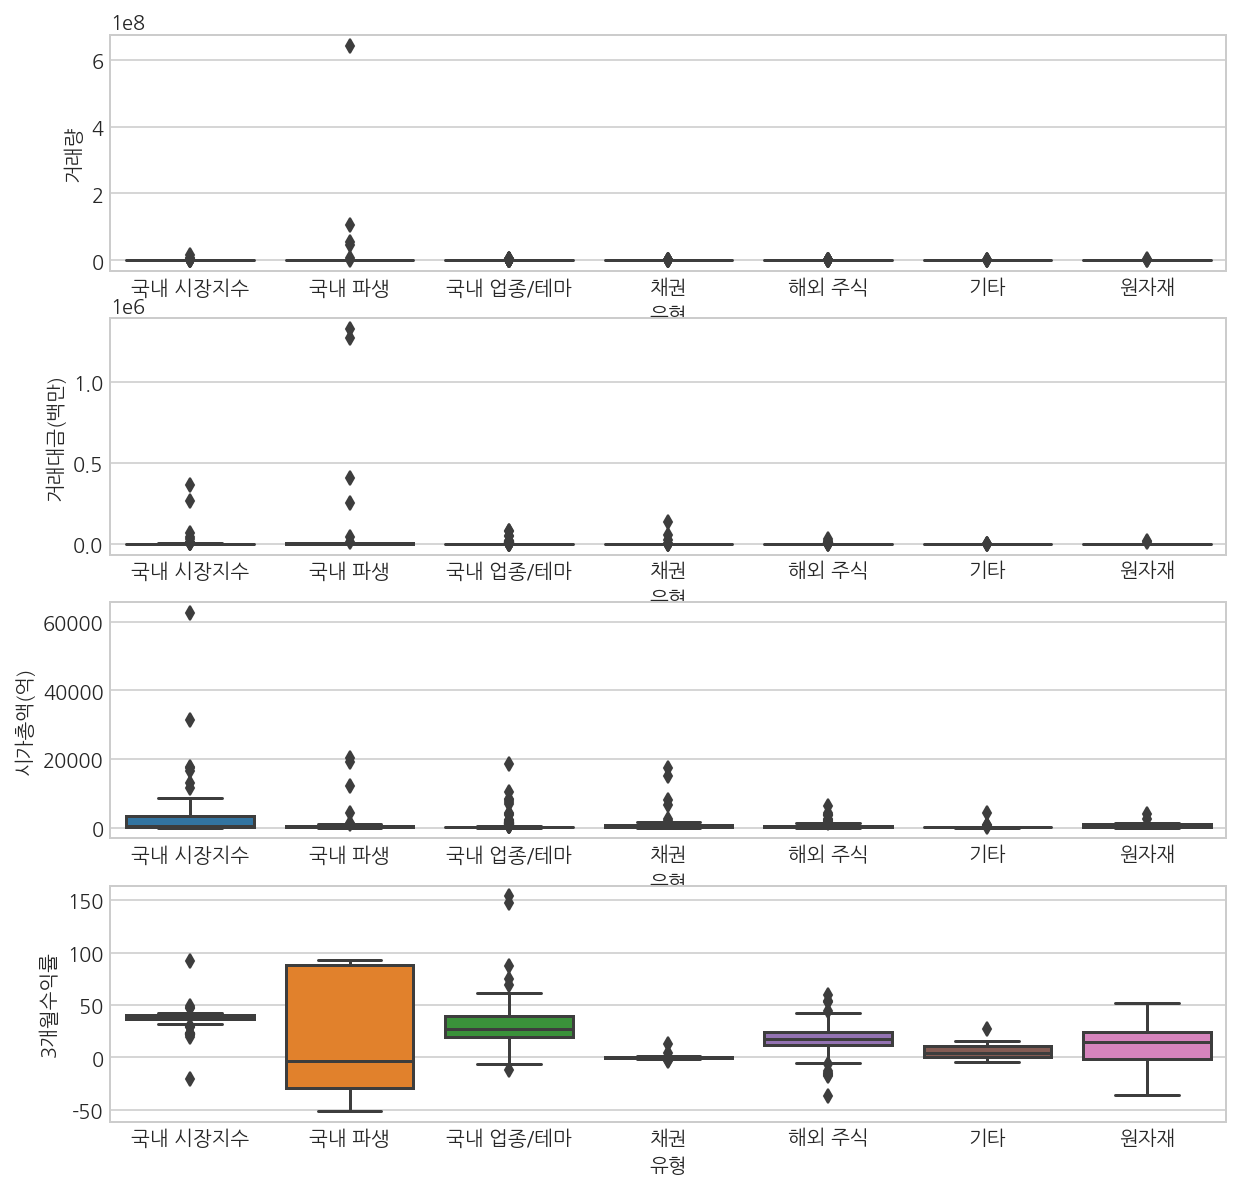

In [65]:
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10, 10))

for i, rcol in enumerate(row_cols):
    sns.boxplot(data=df, x='유형', y=rcol, ax=axes[i])
    
plt.show()

<br>

- `hue='레버리지'` 추가

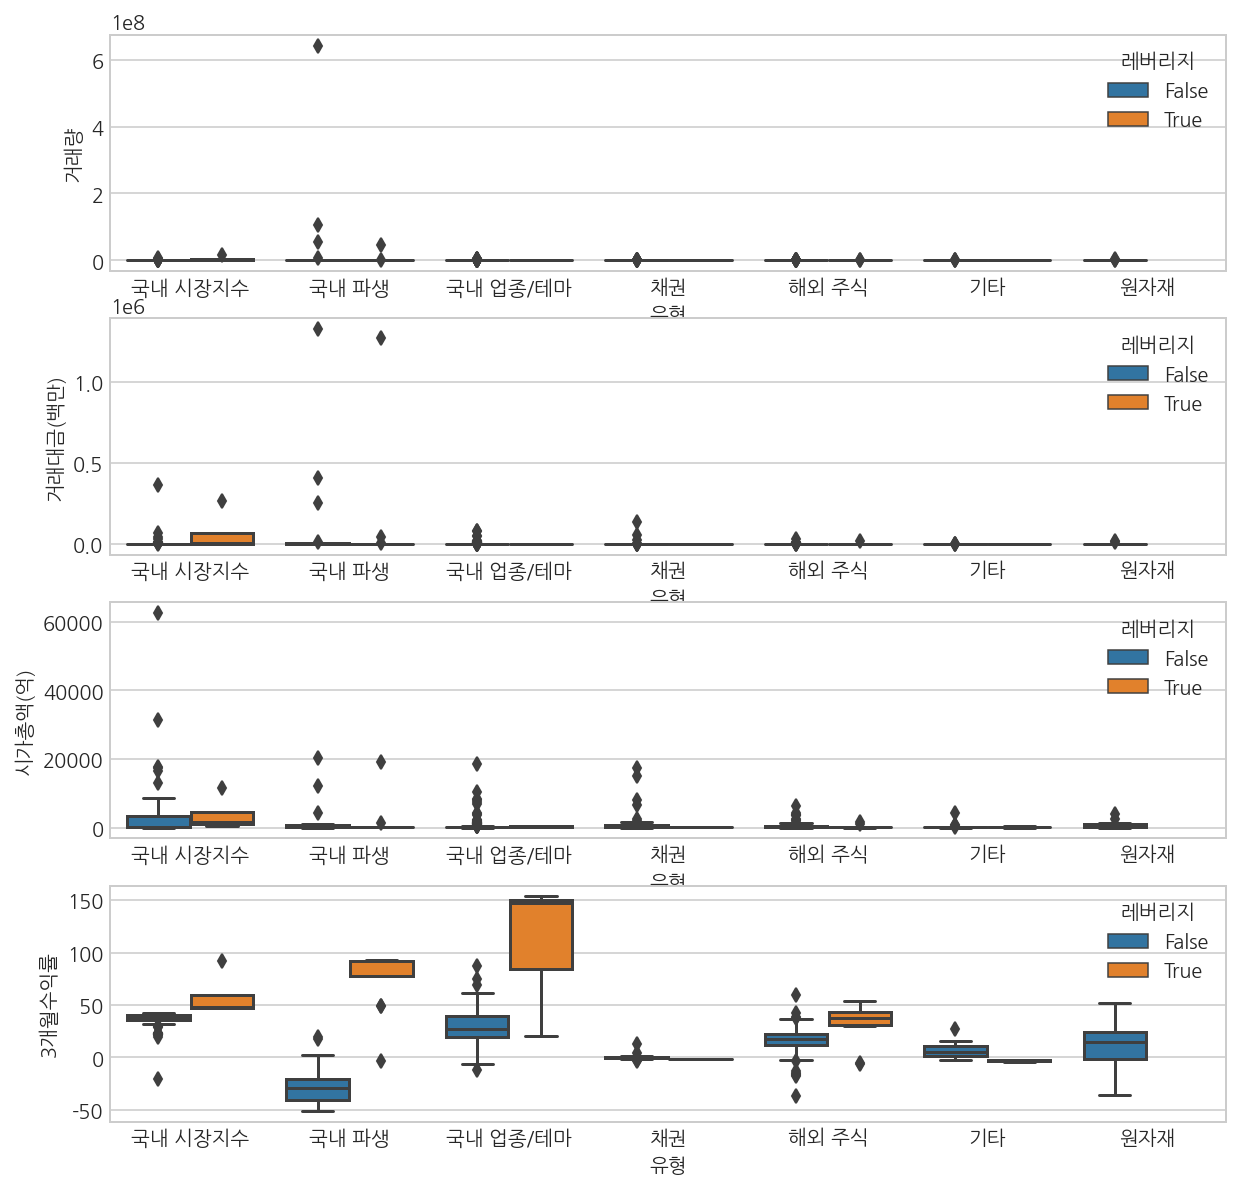

In [73]:
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10, 10))

for i, rcol in enumerate(row_cols):
    sns.boxplot(data=df, x='유형', y=rcol, ax=axes[i], hue='레버리지')
    
plt.show()

<br>

### 10.4.4 `subplots` 으로 유형별 수치 데이터의 violinplot 시각화

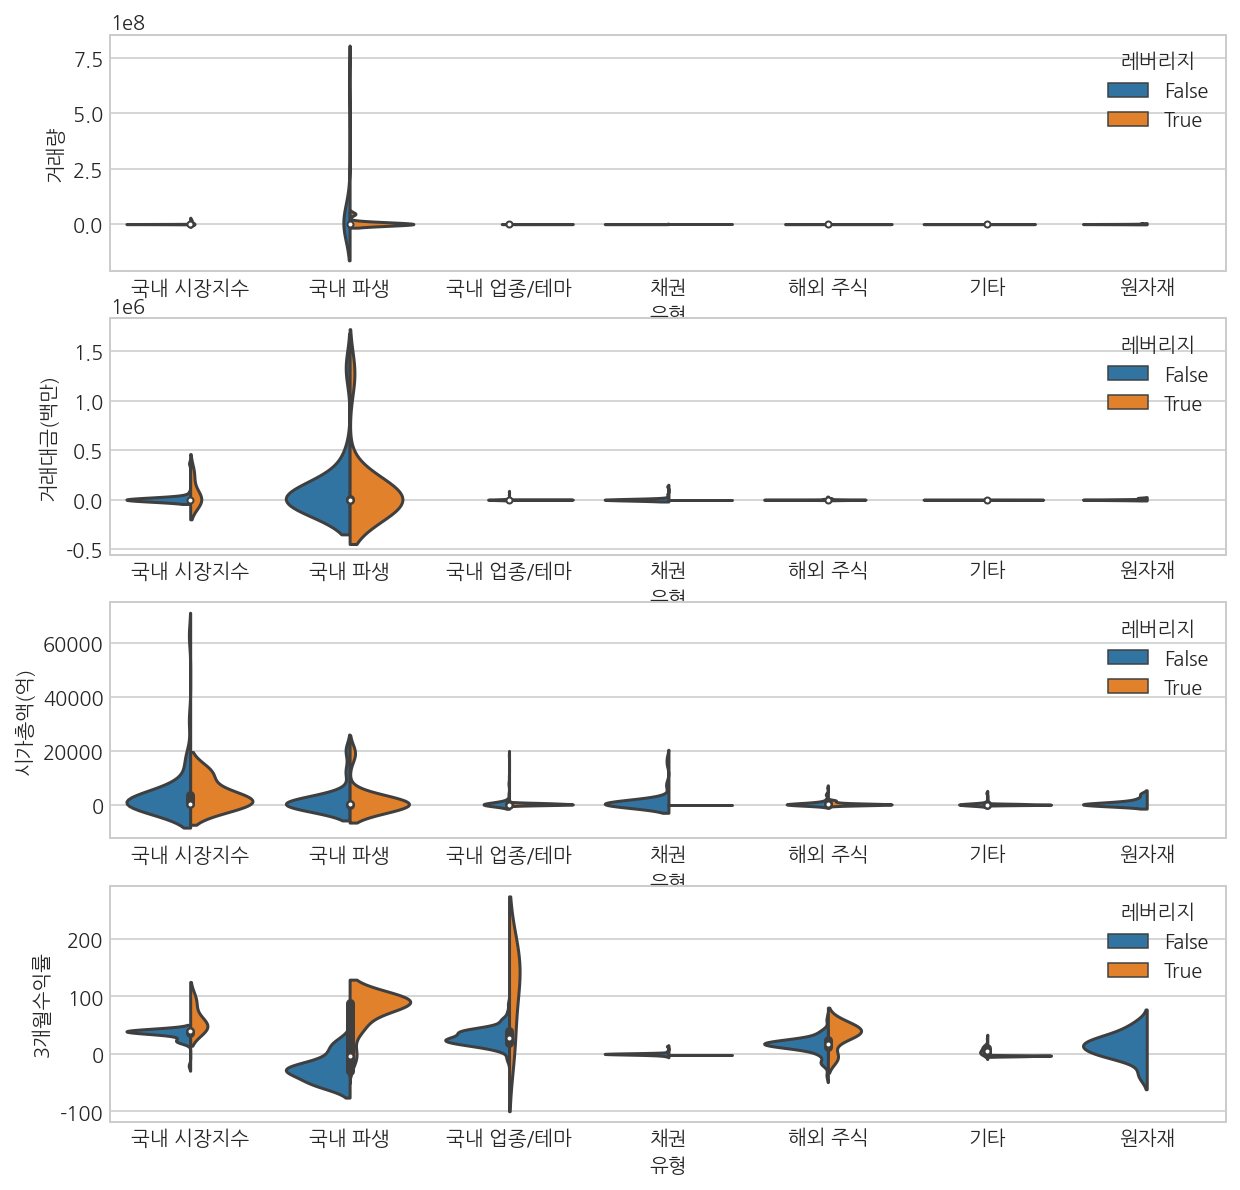

In [75]:
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10, 10))

for i, rcol in enumerate(row_cols):
    sns.violinplot(data=df, x='유형', y=rcol, ax=axes[i], hue='레버리지', split=True)
    
plt.show()